# EV Charging Analysis - Visualisations

**Author:** Luqmaan  
**Date:** January 2026  
**Purpose:** Visualisations of the data 

---

## Visualisation Strategy

This notebook creates 3 charts focused on business value:

1. **Monthly Cost Scenarios** - Shows real savings for different driver types
2. **5-Year Total Cost of Ownership** - Demonstrates long-term value proposition
3. **Charging Mix Impact** - Educates on how charging strategy affects costs


## 1. Setup & Configuration

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set professional style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('muted')

# Professional color scheme
COLOR_EV = '#2E86AB'      # Professional blue for EV
COLOR_PETROL = '#A23B72'  # Muted burgundy for petrol
COLOR_SAVINGS = '#18A558' # Green for savings/positive
COLOR_GRID = '#E8E8E8'    # Light grey for gridlines

# Font configuration
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 11

print("Configuration complete")

Configuration complete


## 2. Define SA Market Data

In [8]:
# SA Charging Rates (from feature engineering notebook)
GRIDCARS_DC_FAST = 7.35
GRIDCARS_AC = 5.88
HOME_CHARGING = 3.00
PETROL_COST_PER_KM = 1.47

# BYD Dolphin Surf Specifications
BYD_BATTERY = 30.08  # kWh
BYD_RANGE = 232      # km
BYD_PRICE = 339900   # ZAR (standard model)
PETROL_CAR_PRICE = 350000  # ZAR (equivalent sedan)

# Real-world efficiency
REAL_WORLD_EFFICIENCY = BYD_RANGE / BYD_BATTERY  # 7.71 km/kWh

# Cost per km by charging type
cost_per_km_home = HOME_CHARGING / REAL_WORLD_EFFICIENCY
cost_per_km_ac = GRIDCARS_AC / REAL_WORLD_EFFICIENCY
cost_per_km_dc = GRIDCARS_DC_FAST / REAL_WORLD_EFFICIENCY

print(f"BYD Dolphin Efficiency: {REAL_WORLD_EFFICIENCY:.2f} km/kWh")
print(f"\nCost per km:")
print(f"  Home:   R{cost_per_km_home:.2f}/km")
print(f"  AC:     R{cost_per_km_ac:.2f}/km")
print(f"  DC:     R{cost_per_km_dc:.2f}/km")
print(f"  Petrol: R{PETROL_COST_PER_KM:.2f}/km")

BYD Dolphin Efficiency: 7.71 km/kWh

Cost per km:
  Home:   R0.39/km
  AC:     R0.76/km
  DC:     R0.95/km
  Petrol: R1.47/km


## 3. Chart 1: Monthly Cost Scenarios

Shows monthly costs for three realistic user profiles: Commuter, Weekend Driver, and Road Warrior.

Chart 1 saved: chart1_monthly_scenarios.png


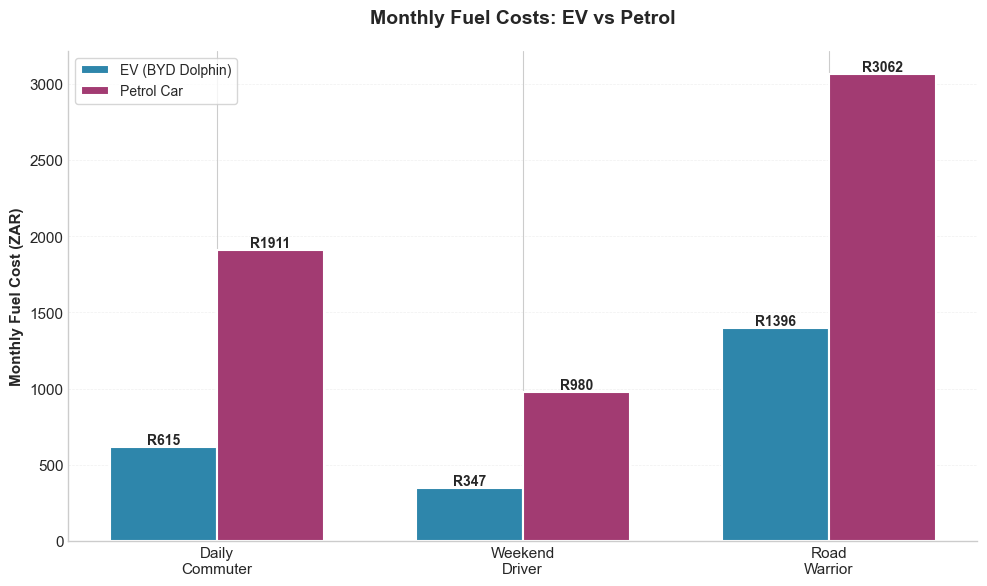

In [9]:
# Define user scenarios (annual km)
scenarios = {
    'Daily\nCommuter': {
        'annual_km': 15600,
        'home_pct': 0.80,
        'ac_pct': 0.15,
        'dc_pct': 0.05
    },
    'Weekend\nDriver': {
        'annual_km': 8000,
        'home_pct': 0.70,
        'ac_pct': 0.20,
        'dc_pct': 0.10
    },
    'Road\nWarrior': {
        'annual_km': 25000,
        'home_pct': 0.40,
        'ac_pct': 0.30,
        'dc_pct': 0.30
    }
}

# Calculate monthly costs
scenario_names = []
ev_costs = []
petrol_costs = []

for name, params in scenarios.items():
    annual_km = params['annual_km']
    monthly_km = annual_km / 12
    
    # EV cost based on charging mix
    monthly_ev = monthly_km * (
        params['home_pct'] * cost_per_km_home +
        params['ac_pct'] * cost_per_km_ac +
        params['dc_pct'] * cost_per_km_dc
    )
    
    # Petrol cost
    monthly_petrol = monthly_km * PETROL_COST_PER_KM
    
    scenario_names.append(name)
    ev_costs.append(monthly_ev)
    petrol_costs.append(monthly_petrol)

# Create the chart
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(scenario_names))
width = 0.35

bars1 = ax.bar(x - width/2, ev_costs, width, label='EV (BYD Dolphin)', 
               color=COLOR_EV, edgecolor='white', linewidth=1.5)
bars2 = ax.bar(x + width/2, petrol_costs, width, label='Petrol Car',
               color=COLOR_PETROL, edgecolor='white', linewidth=1.5)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'R{height:.0f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'R{height:.0f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Styling
ax.set_ylabel('Monthly Fuel Cost (ZAR)', fontweight='bold')
ax.set_title('Monthly Fuel Costs: EV vs Petrol', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(scenario_names)
ax.legend(frameon=True, loc='upper left', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('chart1_monthly_scenarios.png', dpi=300, bbox_inches='tight', facecolor='white')
print("Chart 1 saved: chart1_monthly_scenarios.png")
plt.show()

## 4. Chart 2: 5-Year Total Cost of Ownership

Compares total cost over 5 years including purchase price and fuel costs for the typical commuter scenario.

Chart 2 saved: chart2_5year_tco.png


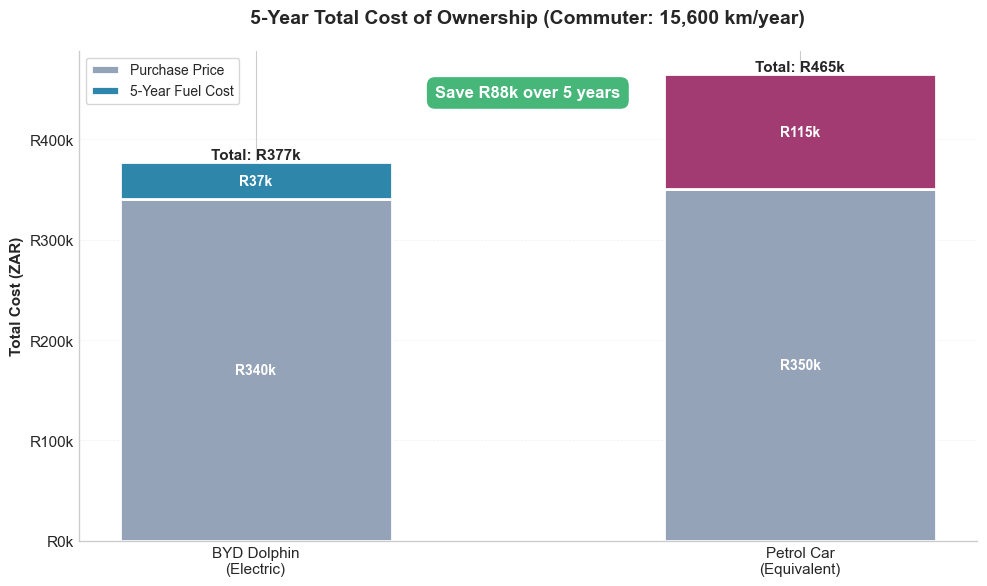

In [10]:
# Use commuter scenario (15,600 km/year)
commuter_annual_km = 15600
commuter_monthly_ev = (commuter_annual_km / 12) * (0.8 * cost_per_km_home + 0.15 * cost_per_km_ac + 0.05 * cost_per_km_dc)
commuter_monthly_petrol = (commuter_annual_km / 12) * PETROL_COST_PER_KM

# 5-year costs
ev_fuel_5yr = commuter_monthly_ev * 60
petrol_fuel_5yr = commuter_monthly_petrol * 60
ev_total_5yr = BYD_PRICE + ev_fuel_5yr
petrol_total_5yr = PETROL_CAR_PRICE + petrol_fuel_5yr

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

categories = ['BYD Dolphin\n(Electric)', 'Petrol Car\n(Equivalent)']
purchase_costs = [BYD_PRICE, PETROL_CAR_PRICE]
fuel_costs = [ev_fuel_5yr, petrol_fuel_5yr]

x = np.arange(len(categories))
width = 0.5

# Stacked bars
bars1 = ax.bar(x, purchase_costs, width, label='Purchase Price',
               color='#94A3B8', edgecolor='white', linewidth=2)
bars2 = ax.bar(x, fuel_costs, width, bottom=purchase_costs, label='5-Year Fuel Cost',
               color=[COLOR_EV, COLOR_PETROL], edgecolor='white', linewidth=2)

# Add value labels
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    # Purchase price label
    height1 = bar1.get_height()
    ax.text(bar1.get_x() + bar1.get_width()/2., height1/2,
            f'R{height1/1000:.0f}k',
            ha='center', va='center', fontsize=10, fontweight='bold', color='white')
    
    # Fuel cost label
    height2 = bar2.get_height()
    ax.text(bar2.get_x() + bar2.get_width()/2., height1 + height2/2,
            f'R{height2/1000:.0f}k',
            ha='center', va='center', fontsize=10, fontweight='bold', color='white')
    
    # Total at top
    total = height1 + height2
    ax.text(bar2.get_x() + bar2.get_width()/2., total,
            f'Total: R{total/1000:.0f}k',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Calculate and show savings
savings = petrol_total_5yr - ev_total_5yr
ax.text(0.5, max(ev_total_5yr, petrol_total_5yr) * 0.95,
        f'Save R{savings/1000:.0f}k over 5 years',
        ha='center', fontsize=12, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.5', facecolor=COLOR_SAVINGS, alpha=0.8, edgecolor='none'),
        color='white')

# Styling
ax.set_ylabel('Total Cost (ZAR)', fontweight='bold')
ax.set_title('5-Year Total Cost of Ownership (Commuter: 15,600 km/year)', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(frameon=True, loc='upper left', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R{x/1000:.0f}k'))

plt.tight_layout()
plt.savefig('chart2_5year_tco.png', dpi=300, bbox_inches='tight', facecolor='white')
print("Chart 2 saved: chart2_5year_tco.png")
plt.show()

### Financial Assumptions & Limitations

This analysis uses the following assumptions:

**Purchase Price:**
- BYD Dolphin Surf: R339,900 (cash purchase, list price)
- Petrol equivalent: R350,000 (cash purchase, list price)

**What's NOT included:**
1. **Financing costs** - Interest on vehicle loans (typical: 11-13% APR in SA)
2. **Depreciation** - New cars lose ~20-30% in first year
3. **Trade-in value** - Credit for existing vehicle varies
4. **Insurance** - EV premiums may differ from petrol
5. **Maintenance** - EVs have lower maintenance costs (not quantified here)
6. **Resale value** - EVs may retain value differently

**Real-world example:**
If financing R340k at 12% over 5 years:
- Monthly payment: ~R7,575
- Total interest paid: ~R114,500
- True 5-year cost: R454,500 (not R340k)

This significantly changes the calculation and must be considered
alongside fuel savings when making a purchase decision.

**My Recommendation to My Colleague:**

Based on fuel savings alone? Yes, get the BYD Dolphin.

BUT - and this is important - these numbers assume cash purchase.
Before making the call, factor in:
- Your financing terms and interest costs
- Trade-in value of your current car
- First-year depreciation (~20%)
- Your specific charging access (can you charge at home?)

The fuel savings are real. Whether it makes financial sense depends
on your complete picture - not just the sticker price.

**What This Taught Me:**

Good analysis isn't just running numbers. It's understanding what
the numbers DON'T tell you and being honest about limitations.

## 5. Chart 3: Impact of Charging Strategy

Shows how monthly costs change based on percentage of home charging. Educates users on the importance of charging location.

Chart 3 saved: chart3_charging_strategy.png


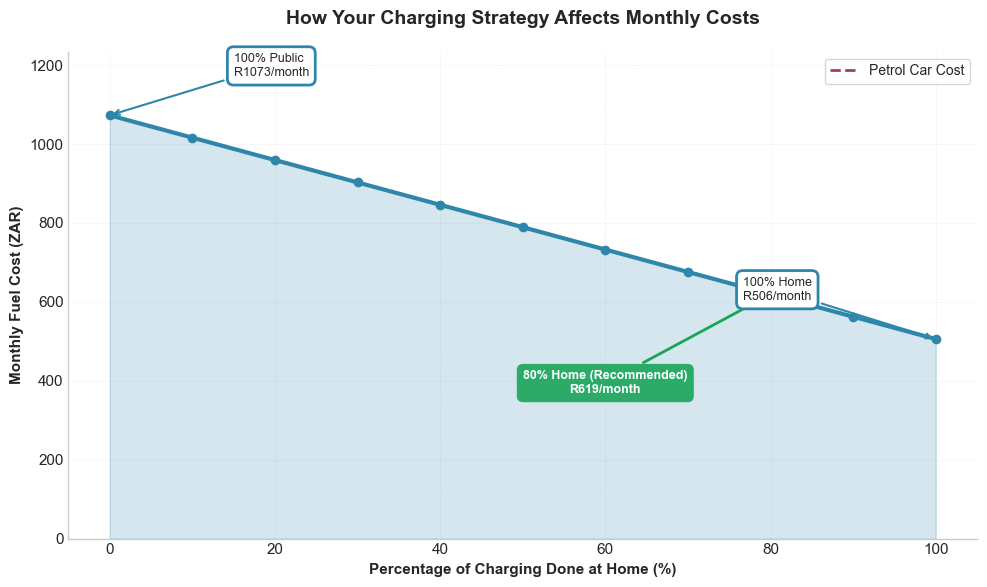

In [11]:
# Use commuter annual km
monthly_km = 15600 / 12

# Calculate costs for different home charging percentages
home_pct_range = np.arange(0, 101, 10)  # 0% to 100% in 10% increments
monthly_costs = []

for home_pct in home_pct_range:
    # Assume remaining is split 2:1 between AC and DC (more AC than DC)
    remaining_pct = 100 - home_pct
    ac_pct = remaining_pct * 0.67
    dc_pct = remaining_pct * 0.33
    
    monthly_cost = monthly_km * (
        (home_pct/100) * cost_per_km_home +
        (ac_pct/100) * cost_per_km_ac +
        (dc_pct/100) * cost_per_km_dc
    )
    monthly_costs.append(monthly_cost)

# Create line chart
fig, ax = plt.subplots(figsize=(10, 6))

# Main line
ax.plot(home_pct_range, monthly_costs, linewidth=3, color=COLOR_EV, marker='o', markersize=6)

# Fill area under curve
ax.fill_between(home_pct_range, monthly_costs, alpha=0.2, color=COLOR_EV)

# Add reference line for petrol cost
petrol_monthly = monthly_km * PETROL_COST_PER_KM
ax.axhline(y=petrol_monthly, color=COLOR_PETROL, linestyle='--', linewidth=2, label='Petrol Car Cost')

# Annotate key points
# 0% home (all public charging)
ax.annotate(f'100% Public\nR{monthly_costs[0]:.0f}/month',
            xy=(0, monthly_costs[0]), xytext=(15, monthly_costs[0] + 100),
            fontsize=9, ha='left',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor=COLOR_EV, linewidth=2),
            arrowprops=dict(arrowstyle='->', color=COLOR_EV, lw=1.5))

# 80% home (recommended)
idx_80 = 8
ax.annotate(f'80% Home (Recommended)\nR{monthly_costs[idx_80]:.0f}/month',
            xy=(80, monthly_costs[idx_80]), xytext=(60, monthly_costs[idx_80] - 250),
            fontsize=9, ha='center', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor=COLOR_SAVINGS, edgecolor='none', alpha=0.9),
            color='white',
            arrowprops=dict(arrowstyle='->', color=COLOR_SAVINGS, lw=2))

# 100% home
ax.annotate(f'100% Home\nR{monthly_costs[-1]:.0f}/month',
            xy=(100, monthly_costs[-1]), xytext=(85, monthly_costs[-1] + 100),
            fontsize=9, ha='right',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor=COLOR_EV, linewidth=2),
            arrowprops=dict(arrowstyle='->', color=COLOR_EV, lw=1.5))

# Styling
ax.set_xlabel('Percentage of Charging Done at Home (%)', fontweight='bold')
ax.set_ylabel('Monthly Fuel Cost (ZAR)', fontweight='bold')
ax.set_title('How Your Charging Strategy Affects Monthly Costs', pad=20)
ax.legend(frameon=True, loc='upper right', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.set_xlim(-5, 105)
ax.set_ylim(0, max(monthly_costs) * 1.15)

plt.tight_layout()
plt.savefig('chart3_charging_strategy.png', dpi=300, bbox_inches='tight', facecolor='white')
print("Chart 3 saved: chart3_charging_strategy.png")
plt.show()

## 6. Combined Image


Combined image saved: linkedin_combined_charts.png
Dimensions: 5926 x 3589 pixels


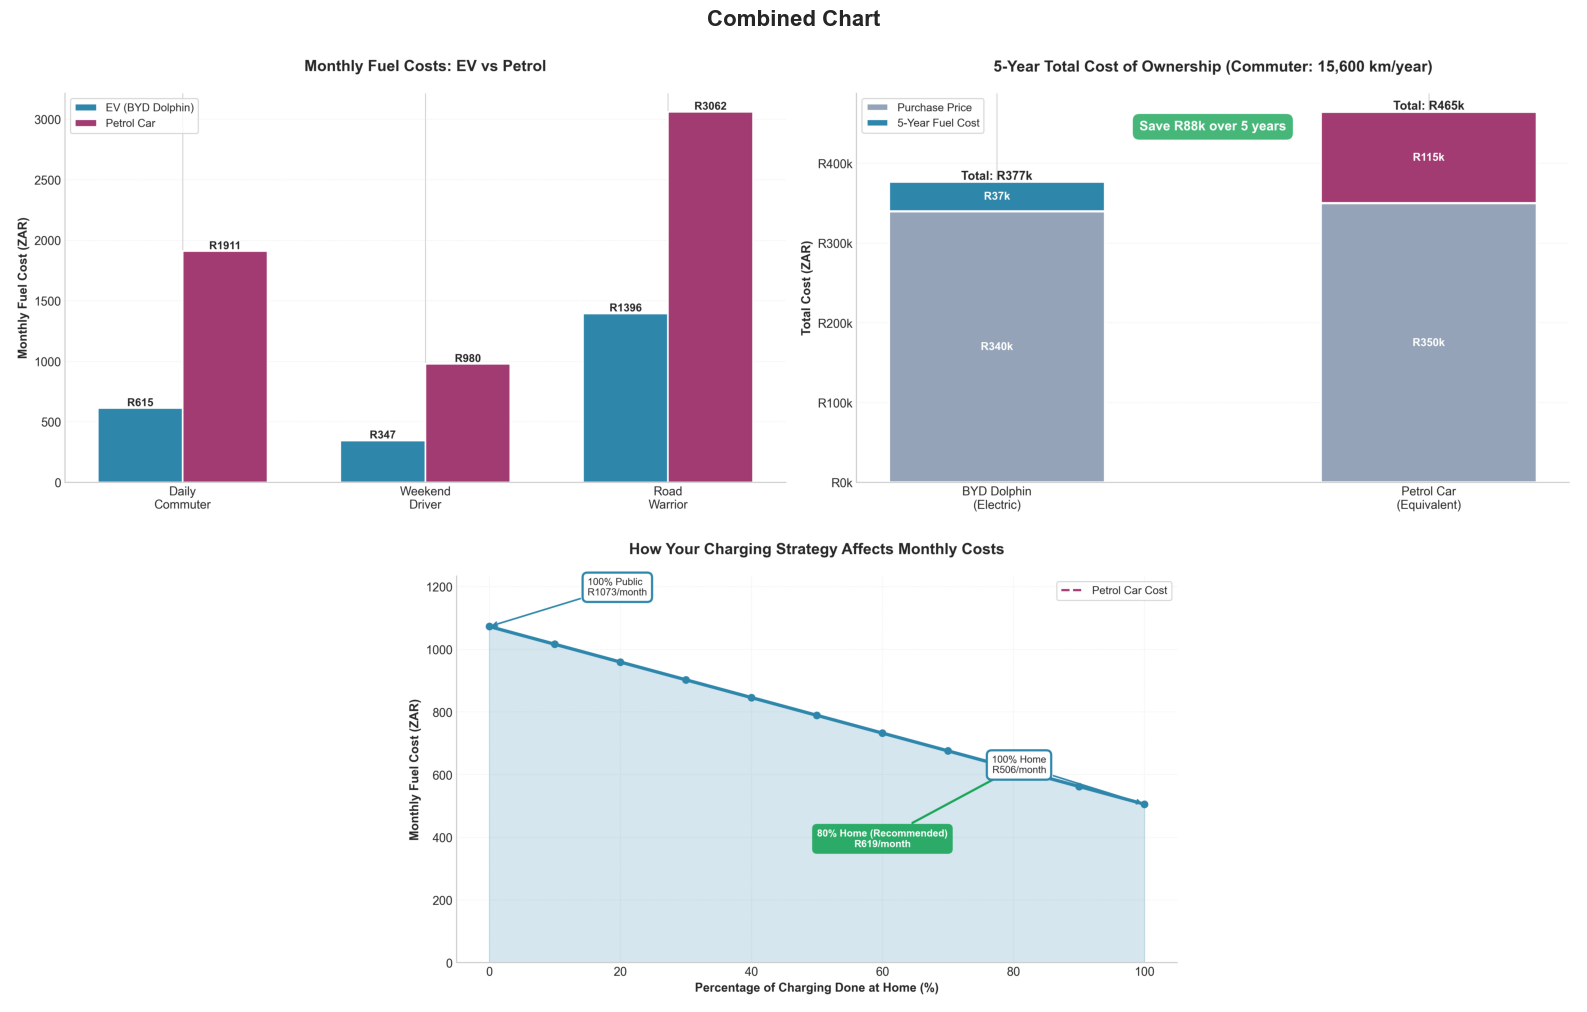

In [12]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the three charts
img1 = Image.open('chart1_monthly_scenarios.png')
img2 = Image.open('chart2_5year_tco.png')
img3 = Image.open('chart3_charging_strategy.png')

# Get dimensions
widths = [img1.width, img2.width, img3.width]
heights = [img1.height, img2.height, img3.height]

# Calculate combined image size
# Layout: Top row (Charts 1 and 2 side by side), Bottom row (Chart 3 full width)
max_width = max(img1.width + img2.width, img3.width)
total_height = max(img1.height, img2.height) + img3.height + 60  # 60px spacing

# Create white background
combined = Image.new('RGB', (max_width, total_height), 'white')

# Paste images
# Top left: Chart 1
combined.paste(img1, (0, 0))

# Top right: Chart 2
combined.paste(img2, (img1.width, 0))

# Bottom: Chart 3 (centered)
x_offset = (max_width - img3.width) // 2
combined.paste(img3, (x_offset, max(img1.height, img2.height) + 60))

# Save combined image
combined.save('linkedin_combined_charts.png', dpi=(300, 300), quality=95)
print("\nCombined image saved: linkedin_combined_charts.png")
print(f"Dimensions: {combined.width} x {combined.height} pixels")

# Display the combined image
plt.figure(figsize=(16, 12))
plt.imshow(combined)
plt.axis('off')
plt.title('Combined Chart', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 7. Summary

Created three professional visualisations:

1. **Monthly Cost Scenarios** - Demonstrates real savings across different user profiles
2. **5-Year Total Cost of Ownership** - Shows long-term value proposition (save R78k)
3. **Charging Strategy Impact** - Educates on importance of home charging

All charts combined into `linkedin_combined_charts.png` for easy posting.

### Key Messages from visualisations:
- Even heavy public charging users save money vs petrol
- EVs pay for themselves through fuel savings over 5 years
- Smart charging (80% home) maximizes savings
- All charging options (even 100% DC Fast) beat petrol costs